#  Unsupervised - Clustering Algorithms

In [ ]:
# Read the CAT 2018 file useravg2018.csv  : Hint - use index_col = 0 argument 
# Examine the head of the data

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('/Data/useravg2018.csv', index_col=0)

In [ ]:
dataset.head()

In [ ]:
dataset.shape[0]

In [ ]:
dataset.describe()

In [ ]:
##### Load the X variable  with columns TOP3_AVG and NMOCKS
X=dataset[['ACC', 'AVG_ATT']].values


#HINT  To Load the X variable  with columns NMOCKS,ATT,OK, ACC, AVG_ATT, use the code below
#X=useravg.iloc[:,[4,5,6,7,8]].values

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X[:5,:]

In [ ]:
X_scaled[:5,:]

In [ ]:
# from sklearn.cluster import KMeans
# %matplotlib inline

## Calculate Entropy - wcss 

In [ ]:
#Calculate WCSS

In [37]:

from sklearn.cluster import KMeans
inertia = []
cl=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    cl.append(i)

## Plot the Elbow Curve

In [38]:
#Display the Elbow Graph

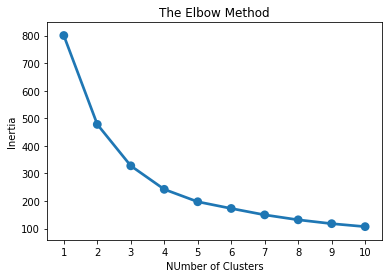

In [39]:
sns.pointplot(x=cl, y=inertia)
plt.title('The Elbow Method')
plt.xlabel('NUmber of Clusters')
plt.ylabel('Inertia')
plt.show()

## Fit the K means to the by choosing the right number of clusters

In [40]:
#Choose the Cluster Size

# It seems 5 to 6 clusters is ideal
# Fitting K-Means to the dataset

In [41]:
# Fit the Algorithm and Predict
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [42]:
#check some of the results
y_kmeans[:10]

array([4, 3, 4, 2, 4, 1, 2, 2, 3, 0])

In [43]:
dataset['cluster']= y_kmeans
dataset.head()

,USER_ID,AVG_PERC,MAX_PERC,TOP3_AVG,NMOCKS,ATT,OK,ACC,AVG_ATT,cluster
1,302344,62.063708,83.095410,80.68,12,636,427,67.14,53.000000,4
2,304203,95.452029,99.654278,98.91,5,379,281,74.14,75.800000,3
5,307798,57.080305,81.070345,65.56,5,258,165,63.95,51.600000,4
7,351294,49.714915,89.949537,75.48,13,790,445,56.33,60.769231,2
9,624217,50.327109,76.604507,65.43,7,309,203,65.70,44.142857,4


## Visualize the Clusters



In [44]:
#Visualize the Clusters

In [45]:
#get the Centroids back unscaled
kmc = scaler.inverse_transform(kmeans.cluster_centers_)

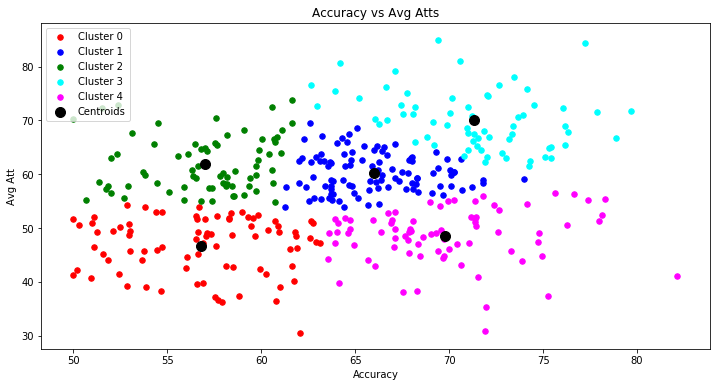

In [46]:
# Plot the 5 cluster
plt.subplots(figsize=(12,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=30, c='red',label='Cluster 0')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=30, c='blue',label='Cluster 1')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=30, c='green',label='Cluster 2')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=30, c='cyan',label='Cluster 3')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=30, c='magenta',label='Cluster 4')
#plt.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], s=30, c='purple',label='Cluster 5')

#Plot the Cluster Centroids
plt.scatter(kmc[:,0], kmc[:,1], s=100, c='black',label='Centroids')
plt.title('Accuracy vs Avg Atts')
plt.xlabel('Accuracy')
plt.ylabel('Avg Att')
plt.legend(loc=2)
plt.show()

In [ ]:
clusters = dataset.groupby('cluster')

In [ ]:
cldata = clusters.mean()
cldata[['ACC', 'AVG_ATT']]

## Rename the Clusters Logically

In [ ]:
#intuition (two-dimension)
#  0 - Remedial, need help to improve att (46) and accuracy (56)
#  1 - Near Achievers, needs more attempts (60)
#  2 - Careless , High Att (61), low accuracy (56)
#  3 - Conservative - Good Acc (69), Too few attempts (48)
#  4 - High Achievers , with good acc (71) and att (70)

In [ ]:
#2 Dimension
%matplotlib inline
plt.subplots(figsize=(12,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=30, c='red',label='Remedial')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=30, c='blue',label='Near Achievers')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=30, c='green',label='Careless')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=30, c='cyan',label='Conservative')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=30, c='magenta',label='High Achievers')
#plt.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], s=30, c='purple',label='Cluster 6')
plt.scatter(kmc[:,0], kmc[:,1], s=100, c='black',label='Centroids')
plt.title('Accuracy vs Avg Atts')
plt.xlabel('Accuracy')
plt.ylabel('Avg Att')
plt.legend(loc=2)
plt.show()

# Assignment

You are required to cluster customers as per their annual income and spending habits

The data is in the file *'/Data/Mall_Customers.csv'*



In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# Load the data set using pandas read_csv from the file '/Data/Mall_Customers.csv'
dataset = None



In [ ]:
# Check the  dataset by  inspect the head of the data

dataset.head()

In [ ]:
#Load the X variable with the columns Annual Income (k$) and Spending Score (1-100)
# Hint use the column numbers in brackets instead of the column names - e.g instead of ['Genre','Age'] we can write [1,2]

X = None

In [ ]:
# check the shape of the X
X.shape

In [ ]:
#Scale the data - just run this code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Calculate Entropy - wcss 

In [ ]:
#Import kmeans and add code here

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
#display the wcss array
wcss

## Plot the Elbow Curve

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Fit the K means to the by choosing the right number of clusters

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

## Visualize the Clusters

Set plot title to 'Clusters of Customers'
Set xlabel = 'Annual Income (k$)'
Set ylabel = 'Spending Score (1-100)'

In [ ]:
#get the kmeans cluster centroids (unscaled)
kmc = scaler.inverse_transform(kmeans.cluster_centers_)


In [ ]:
# Visualising the clusters

plt.subplots(figsize=(9,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=30, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=30, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=30, c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=30, c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=30, c='magenta',label='Cluster 5')
plt.scatter(kmc[:, 0], kmc[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=0)
plt.show()

## Rename the Clusters Logically

In [ ]:
# Visualising the clusters - Run this code


plt.subplots(figsize=(9,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=30, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=30, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=30, c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=30, c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=30, c='magenta',label='Cluster 5')
plt.scatter(kmc[:, 0], kmc[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=0)
plt.show()


# Congratulations !

## You have completed your first Unsupervised Algorithm using K means clustering

# Solutions

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Load the data set

# Importing the dataset
dataset = pd.read_csv('/Data/Mall_Customers.csv')
dataset.head()


In [ ]:
#Load the X variable with the columns Annual Income (k$) and Spending Score (1-100)
# Hint use the column numbers in brackets instead of the column names - e.g instead of ['Genre','Age'] we can write [1,2]

X = dataset.iloc[:, [3, 4]].values
X.shape

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
#display the wcss array
wcss

## Plot the Elbow Curve

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Fit the K means to the by choosing the right number of clusters

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
#get the kmeans clusters (unscaled)
kmc = scaler.inverse_transform(kmeans.cluster_centers_)

## Visualize the Clusters

Set plot title to 'Clusters of Customers'
Set xlabel = 'Annual Income (k$)'
Set ylabel = 'Spending Score (1-100)'

In [ ]:
# Visualising the clusters

plt.subplots(figsize=(9,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=30, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=30, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=30, c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=30, c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=30, c='magenta',label='Cluster 5')
plt.scatter(kmc[:, 0], kmc[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=0)
plt.show()

## Rename the Clusters Logically

In [ ]:
# Visualising the clusters
plt.subplots(figsize=(9,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Target')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Loyal')
plt.scatter(kmc[:, 0], kmc[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# End of Solutions !



# Additional Code

In [ ]:
# For multiple dimensions

plt.subplots(figsize=(12,6))
plt.scatter(X[y_kmeans==0,3], X[y_kmeans==0,4], s=30, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,3], X[y_kmeans==1,4], s=30, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,3], X[y_kmeans==2,4], s=30, c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,3], X[y_kmeans==3,4], s=30, c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,3], X[y_kmeans==4,4], s=30, c='magenta',label='Cluster 5')
#plt.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], s=30, c='purple',label='Cluster 6')
plt.scatter(kmc[:,3], kmc[:,4], s=100, c='black',label='Centroids')
plt.title('Accuracy vs Avg Atts')
plt.xlabel('Accuracy')
plt.ylabel('Avg Att')
plt.legend(loc=2)
plt.show()

In [ ]:
#intuition (multi-dimension)
#  0 - High Achievers, with good acc and att
#  1 - Near Achievers (10 mocks,  65 acc, 60 att)
#  2-  carelesss, 61 ATT with 56 acc
#  3 - Low Attempters - 81%ilers, 69% acc, Low attempts (48)
#  4 - High Achievers (10 mocks, 71 acc and 71 att)

In [ ]:
# Displaying using SNS
dispdf = pd.DataFrame({'acc':X[:,0],'att': X[:,1], 'cluster':y_kmeans})
centroids = pd.DataFrame({'acc':kmc[:,0],'att': kmc[:,1]})
centroids['cluster']='Centroid'
#dispdf = dispdf.append(centroids, ignore_index=True)
#dispdf.loc[(dispdf.cluster=='c'),'size']=200

In [ ]:
# for two dimensions
plt.figure(figsize=(9,9))
sns.scatterplot("acc", "att", s=50, hue="cluster",data=dispdf,palette=['r','g','b','c','m'])
sns.scatterplot("acc", "att", s=100,data=centroids,color=['black'], label='Clusters')
